In [2]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

2022-11-07 18:29:46.639709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 18:29:47.764695: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/andrew/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-11-07 18:29:47.764750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-07 18:29:47.842754: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

In [134]:
# Data Preparation
dataset = pd.read_csv('../Data/train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt', 'LotArea']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
norm_coeff = max(y)
print(norm_coeff)
y = y/norm_coeff#100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed_value)

755000


In [135]:
# Plot results function
def plot_history(history, k):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*k, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*k, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*k)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*k)

In [138]:
# Building the Network
inputs = Input(shape=x.shape[1])
outputs = Dense(7, activation='relu')(inputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 6)]               0         
                                                                 
 dense_120 (Dense)           (None, 7)                 49        
                                                                 
 dense_121 (Dense)           (None, 1)                 8         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


Train MAE      20285.265939310193
Validation MAE 20629.496527835727
Final error: 0.2023732289671898 %


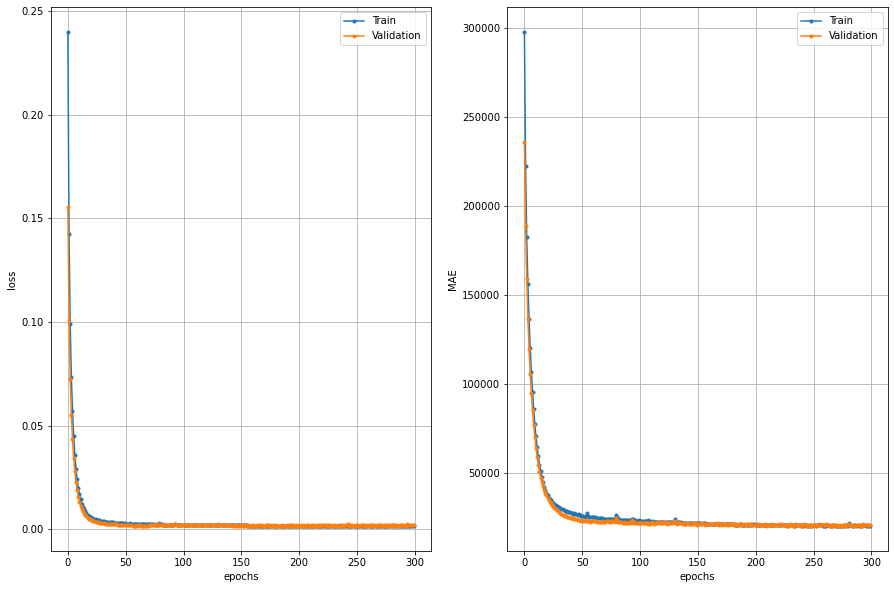

In [139]:
# Training the Network
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=300, batch_size=32, verbose=0)
plot_history(history, norm_coeff)
print('Final error:', history.history['val_loss'][-1] * 100, '%')

**Answers**

    New price estimation error:
        Train MAE      20285.265939310193
        Validation MAE 20629.496527835727
        Final error: 0.2023732289671898 % - It is much better than before.
    
    Adding more features and more neurons helps but not much.
    
    My changes for improv the network:
         - Added +1 feature;
         - Added more neurons - 7 as features;
         - Changed utput values normalization coefficient from 10e5 to max
         - Increased number of epochs